# Unions over Time

In [ ]:
import os
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [9]:
path = '../data/Networld_N40_TMax5000_Kinetics_Binomial_K5/'

dict_var = {}
for file in os.listdir(path):
    info = file.split('_')
    if info[0] == 'nunions':
        mat = loadmat(path+file)
        vec = mat['nunions_time'][0]
        beta = float(info[2][4:])
        if beta not in dict_var.keys():
            dict_var[beta] = [vec]
        else:
            dict_var[beta].append(vec)

for key in dict_var.keys():
    dict_var[key] = np.array(dict_var[key])
    dict_var[key] = np.mean(dict_var[key], axis=0)

plot_data = pd.DataFrame(dict_var)

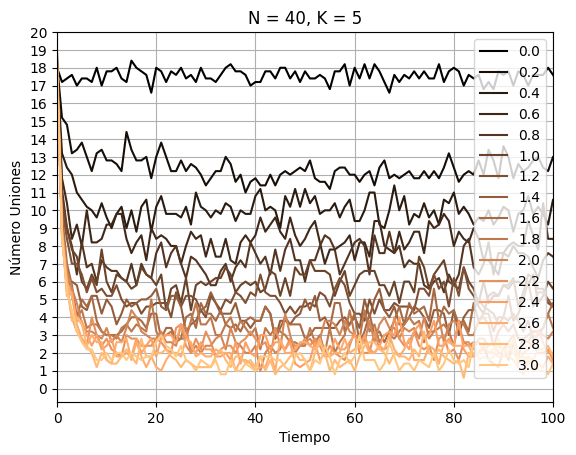

In [12]:
columns = [0,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2,2.2,2.4,2.6,2.8,3]
plot_data[columns].plot(colormap='copper')
plt.xlim(0,100)
plt.xlabel('Tiempo')
plt.ylabel('Número Uniones')
plt.title('N = 40, K = 5')
plt.yticks(np.arange(0,21,1))
plt.grid()

Unions over Networks

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import binom, poisson
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [ ]:
num_nodos = 120
k = 5
binom_p = k/num_nodos

In [ ]:
num_redes = np.arange(1, num_nodos+1)
num_unions = np.zeros((num_nodos+1, 1000), dtype=int)
freq_unions = np.zeros((num_nodos+1, num_nodos//2 +1), dtype=int)

for nr in num_redes:
    binom_n = (nr-1)*(nr-1)

    for i in range(1000):
        sampled_unions = binom.rvs(binom_n, binom_p)
        P = np.zeros(nr)

        for j in range(sampled_unions):
            R1 = np.random.randint(nr)
            R2 = np.random.randint(nr)
            while R1 == R2:
                R2 = np.random.randint(nr)
            if P[R1] == 1 or P[R2] == 1:
                continue
            else:
                P[R1] = 1
                P[R2] = 1
                num_unions[nr,i] += 1
        
        final_num = num_unions[nr,i]
        freq_unions[nr, final_num] += 1

In [ ]:
mean_unions = num_unions.mean(axis=1)

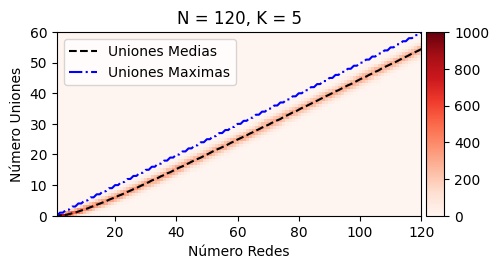

In [ ]:
plt.figure(figsize=(5,4))
x = np.arange(0, num_nodos+1)
plt.plot(x, mean_unions, '--', color='black', label='Uniones Medias')
plt.plot(x, x//2, '-.', color='blue', label='Uniones Maximas')
im = plt.imshow(freq_unions.T, cmap='Reds')
plt.ylim(0,num_nodos//2)
plt.xlim(1,num_nodos)
plt.xlabel('Número Redes')
plt.ylabel('Número Uniones')
plt.legend(loc='upper left')
plt.title(f'N = {num_nodos}, K = {k}')

ax = plt.gca()
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
   
plt.colorbar(im, cax=cax)